Assignment 5
Data Visualization II
Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for distribution of age with respect to each gender along with the information about whether they survived or not. (Column names : 'sex' and 'age')
Write observations on the inference from the above statistics.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [60]:
df["age"] = df["age"].fillna(df["age"].mean())

In [61]:
df["deck"] = df["deck"].ffill()

In [62]:
df.dropna(inplace=True)

<Axes: ylabel='fare'>

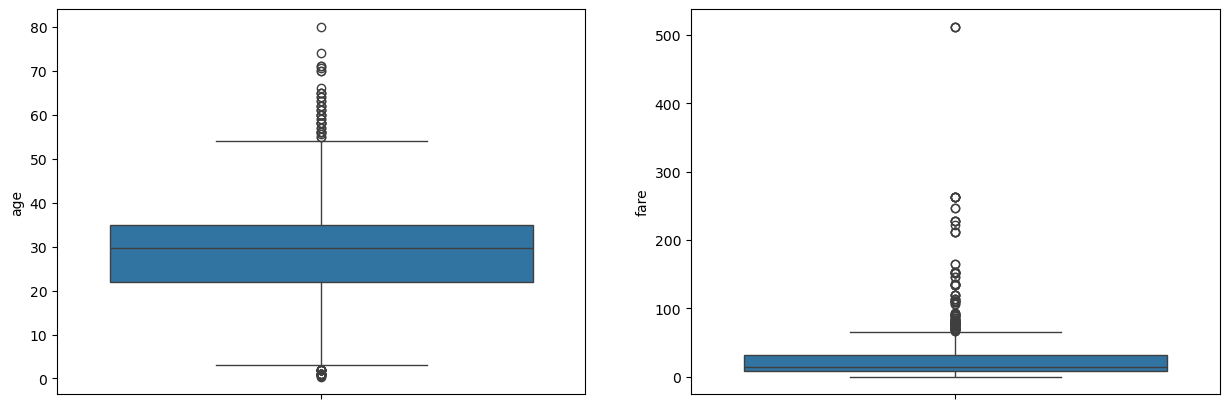

In [63]:
fig , axes = plt.subplots(1 , 2 , figsize=(15 , 5))
sns.boxplot(data = df["age"] , ax=axes[0] )
sns.boxplot(data = df["fare"] , ax=axes[1] )


In [64]:
def IQR_outlier(df , feature):
    q1 = np.percentile(df[feature] , 25)
    q3 = np.percentile(df[feature] , 75)

    iqr = q3 - q1

    lower_bound = q1 - 1.0 * iqr
    upper_bound = q3 + 1.0 * iqr


    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

    return df

df = IQR_outlier(df , "age")
df = IQR_outlier(df , "fare")

<Axes: ylabel='fare'>

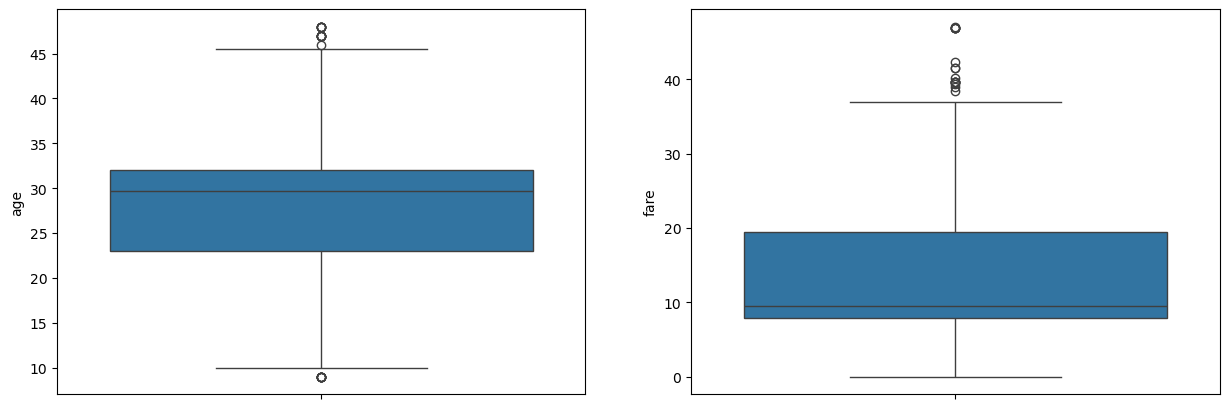

In [65]:
fig , axes = plt.subplots(1 , 2 , figsize=(15 , 5))
sns.boxplot(data = df["age"] , ax=axes[0] )
sns.boxplot(data = df["fare"] , ax=axes[1] )


In [66]:
def min_max_normalization(df , feature):
    min_value = df[feature].min()
    max_value = df[feature].max()

    df[feature] = (df[feature] - min_value) / (max_value - min_value)

    return df

df = min_max_normalization(df , "age")
df = min_max_normalization(df , "fare")

<Axes: ylabel='fare'>

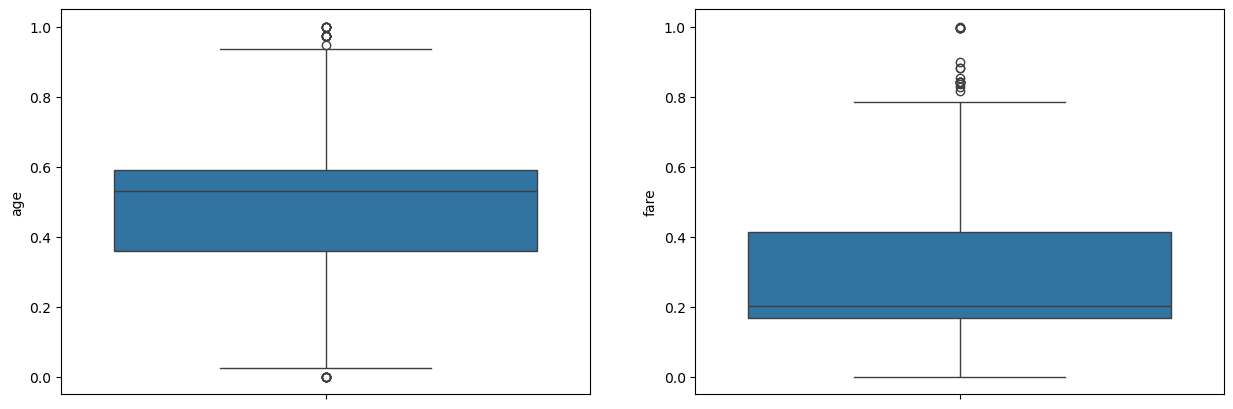

In [67]:
fig , axes = plt.subplots(1 , 2 , figsize=(15 , 5))
sns.boxplot(data = df["age"] , ax=axes[0] )
sns.boxplot(data = df["fare"] , ax=axes[1] )


In [68]:
df["fare"] = np.log1p(df["fare"])  # Apply log transformation
df = IQR_outlier(df, "fare")       # Reapply IQR filtering


<Axes: ylabel='fare'>

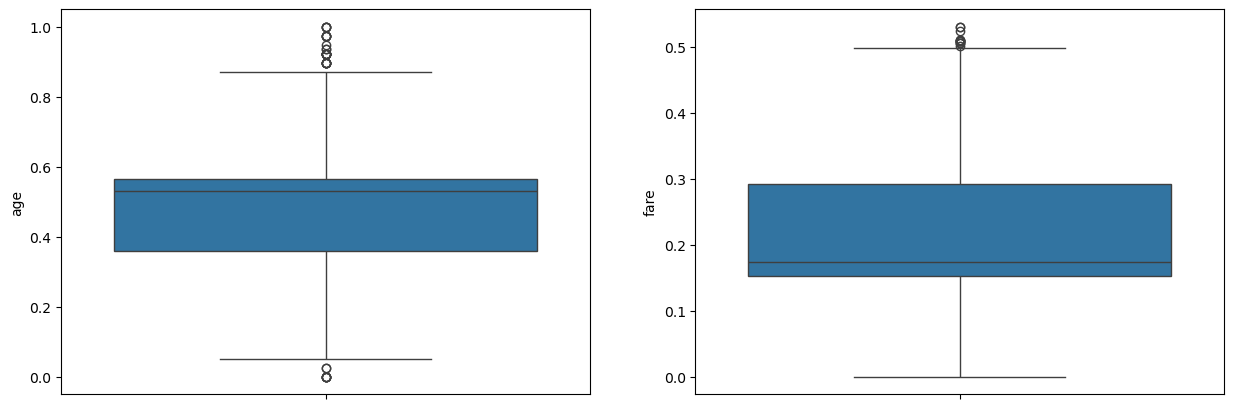

In [69]:
fig , axes = plt.subplots(1 , 2 , figsize=(15 , 5))
sns.boxplot(data = df["age"] , ax=axes[0] )
sns.boxplot(data = df["fare"] , ax=axes[1] )

<Axes: xlabel='sex', ylabel='age'>

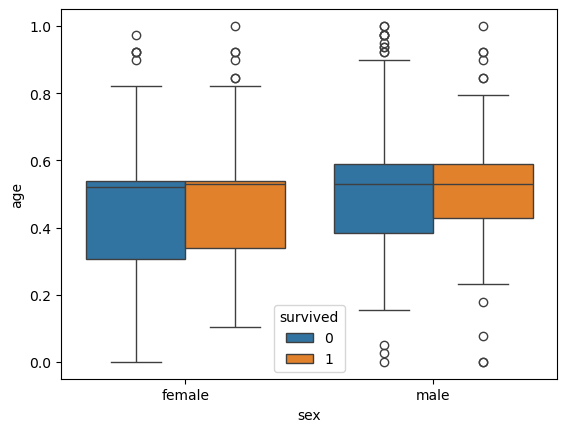

In [70]:
sns.boxplot(data=df, x="sex", y="age", hue="survived")